In [15]:
%matplotlib inline

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt

os.chdir('/home/esther/Desktop/BehavioralTraining/code')

from preprocessingFunctions import loadData
from preprocessingFunctions import preProcessChoices
from preprocessingFunctions import preProcessReactionTimes
from preprocessingFunctions import makeSideChoices
from preprocessingFunctions import removeCancelledTrials

from strategyFunctions import simulateStrategies

from scoringFunctions import manualScoring
from scoringFunctions import calcScoresPerDay
from scoringFunctions import scorePerPhase
from scoringFunctions import scoreStrategy
from scoringFunctions import scoreChoicesUnfiltered
from scoringFunctions import calcNormStratScores

from plottingFunctions import plotIt

In [6]:
os.chdir('/home/esther/Desktop/BehavioralTraining')

In [7]:
#%% load data
Adat,Mdat = loadData()

## Manual Scoring

In [9]:
manualScores = manualScoring(Mdat)

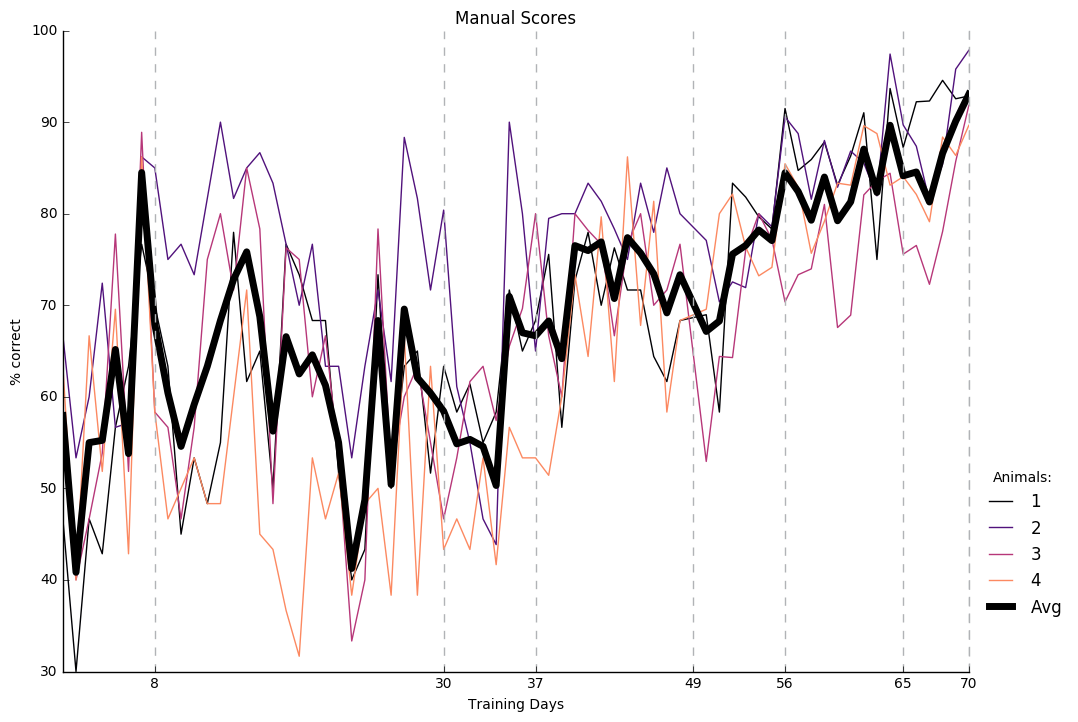

In [10]:
plotIt(manualScores, title = "Manual Scores", ylabel = "% correct", Phase = False, Norm = False)

## Scoring based on rewards given (threshold varies per phase)

In [6]:
Scores = scorePerPhase(Adat,Mdat)

I'll compare the different thresholds for amount of treats given to count as a correct trial, and the phase in which the threshold was valid. I've been bad however here and actually changed the parameters in the function itself, and just restarted the kernel in the notebook for every different parameter. This was because the function to calculate the score consists of 3 functions, one of which is looped over per day using .apply() and I can't figure out how to give more than one argument to apply. Since I didn't want to lose too much time on this I've simply gone for the quick and (very) dirty method. I realise it's also not exactly user friendly to read, will work on that. 

When the threshold for a correct trial consists of > 3 rewards (additional reward + sensor triggered reward) for phase 1, and >2 rewards for all phases after that.  

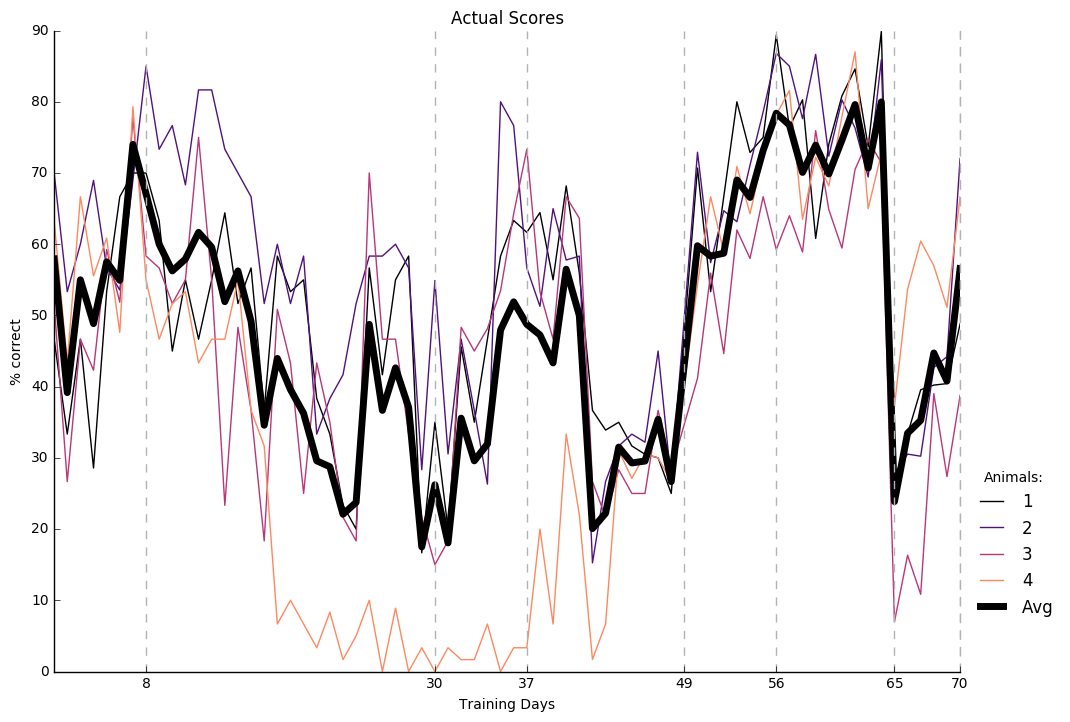

In [7]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

When the threshold for a correct trial consists of > 2 awards for phase 1, and > 1 award for phases after that. This is fairly accurate of the actual situations since in the first phase often 3 or more treats were given for a correct trial, but this changed to 2 in phase 2 and beyond. 

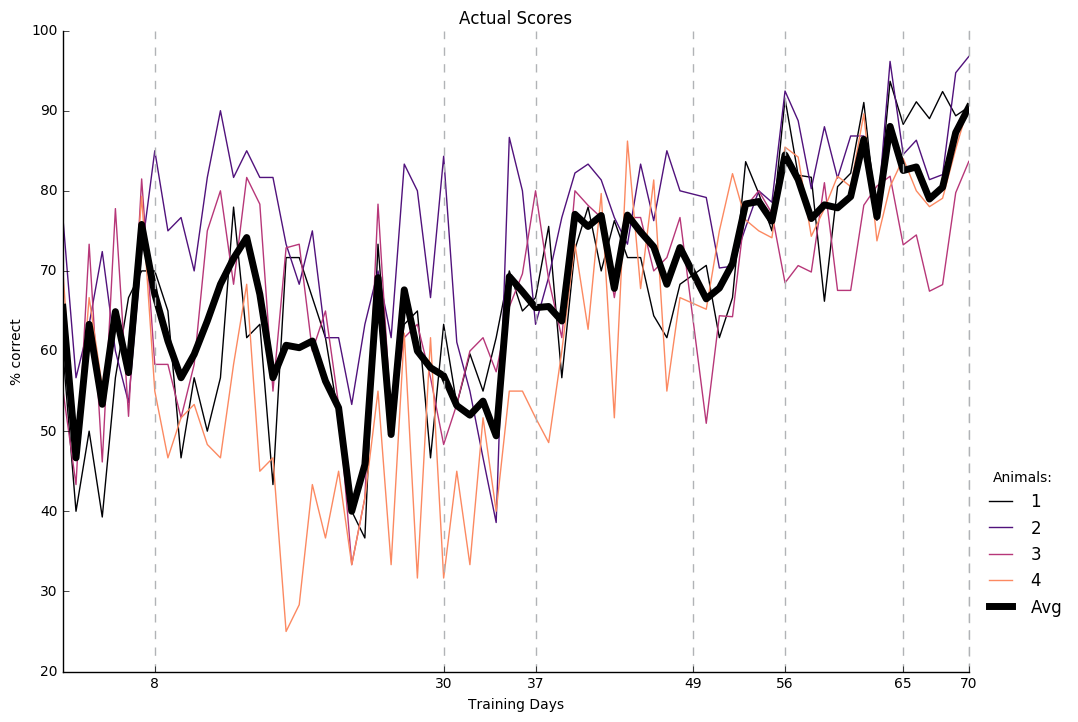

In [7]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

Same as above but this time the threshold was > 2 for phases 1 and 2, and >1 for the remaining phases

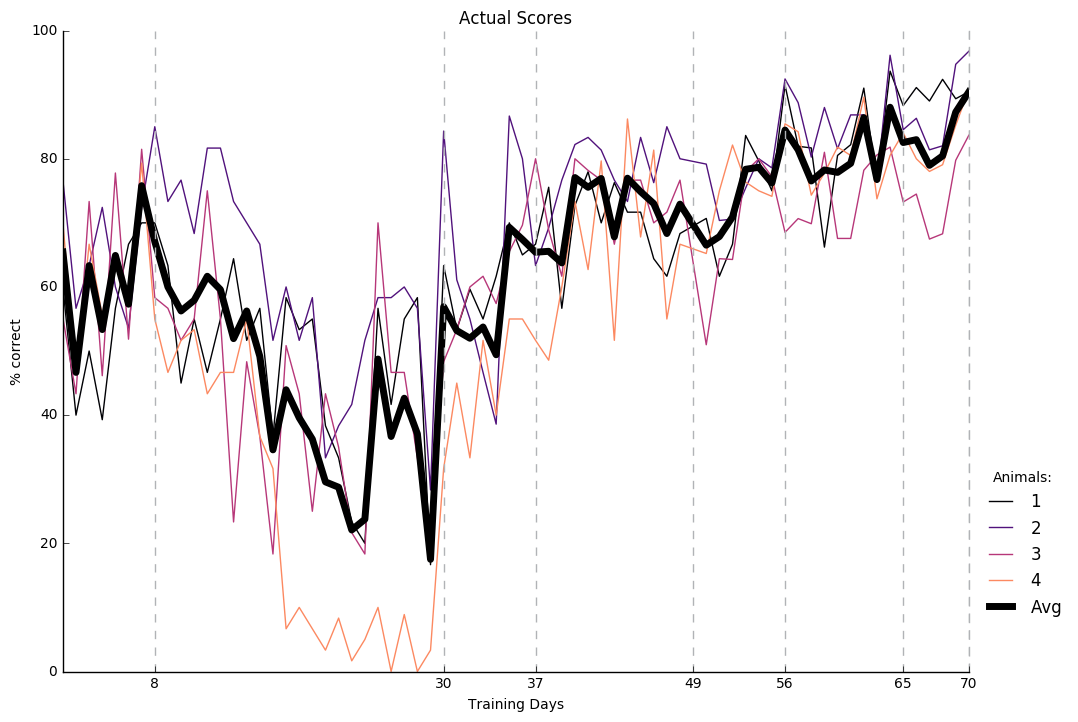

In [7]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

Same as above but this time the threshold was > 2 for phases 1,2, and 3 and >1 for the remaining phases

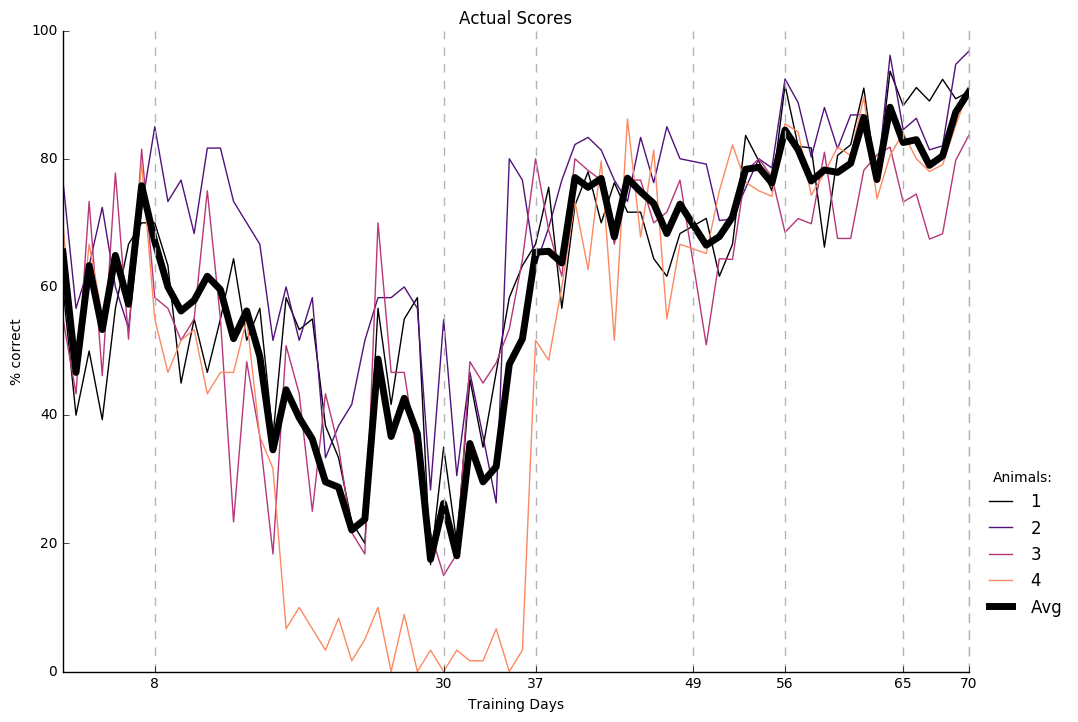

In [7]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

Same as above but this time the threshold was > 2 for phases 1,2, 3 and 4 and >1 for the remaining phases

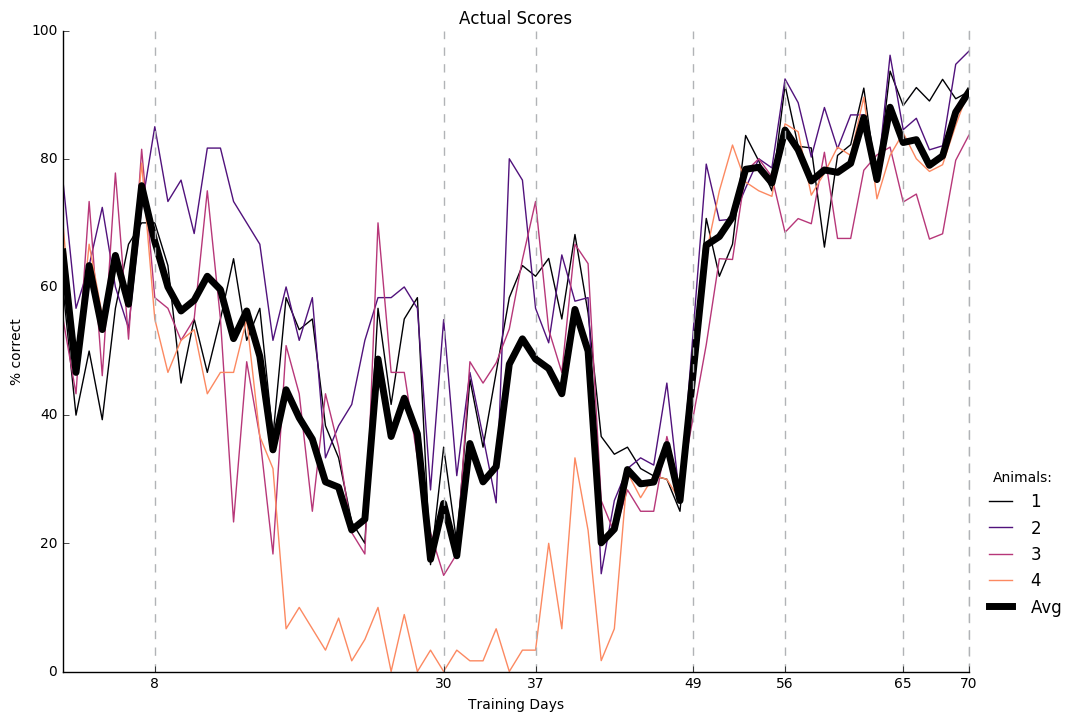

In [7]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

When the threshold for a correct trial consists of > 3 rewards (additional reward + sensor triggered reward) for phase 1 and 2, and >2 rewards for all phases after that.  

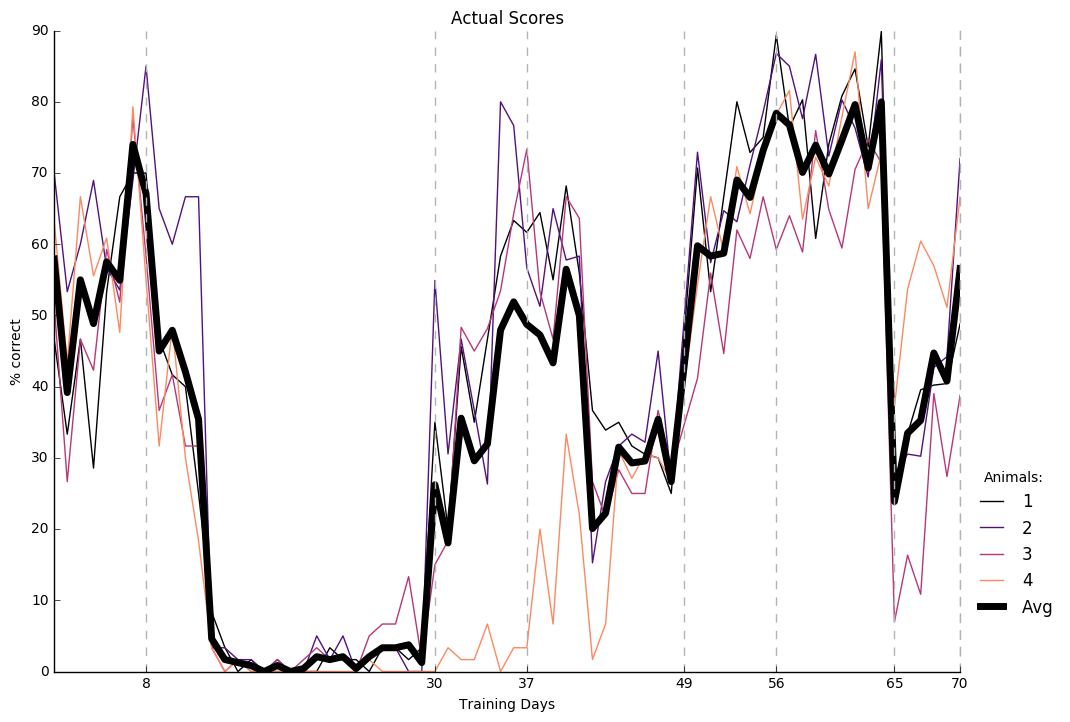

In [7]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

When the threshold for a correct trial consists of > 3 rewards (additional reward + sensor triggered reward) for phase 1,2 and 3, and >2 rewards for all phases after that.  

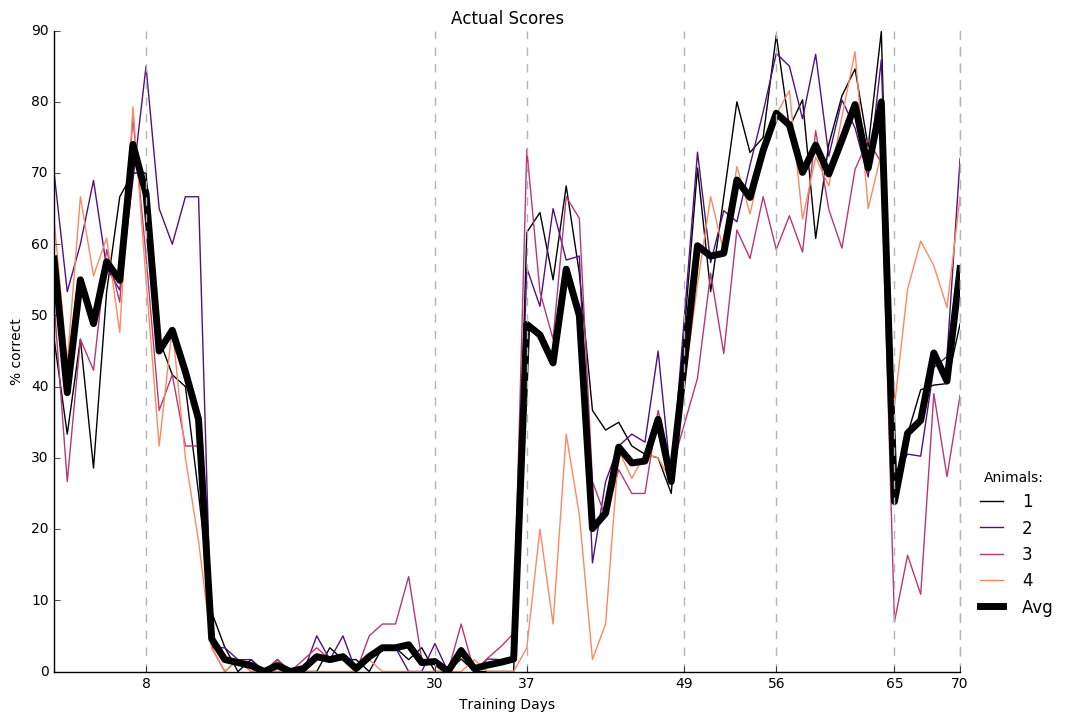

In [7]:
plotIt(Scores, title = "Actual Scores", ylabel = "% correct", Phase = False, Norm = False)

## Scoring based on sensors

In the first two phases in particular (to some degree still in phase 3 and 4 as well) the sensors did not always pick up a correct choice reliably. Often the rat's tail or body would activate the sensors while the rat was still at the nose poke, or when it started turning towards one of the areas. In these phases the researcher watched the rat carefully and rewarded based on his movement in the correct direction, regardless of sensor readings. 

In [12]:
choices,sides = preProcessChoices(Adat,Mdat)

In [13]:
correct, incorrect, nTotalTrials  = scoreChoicesUnfiltered(choices, sides)

In [17]:
sensorScores = calcScoresPerDay(correct, nTotalTrials)

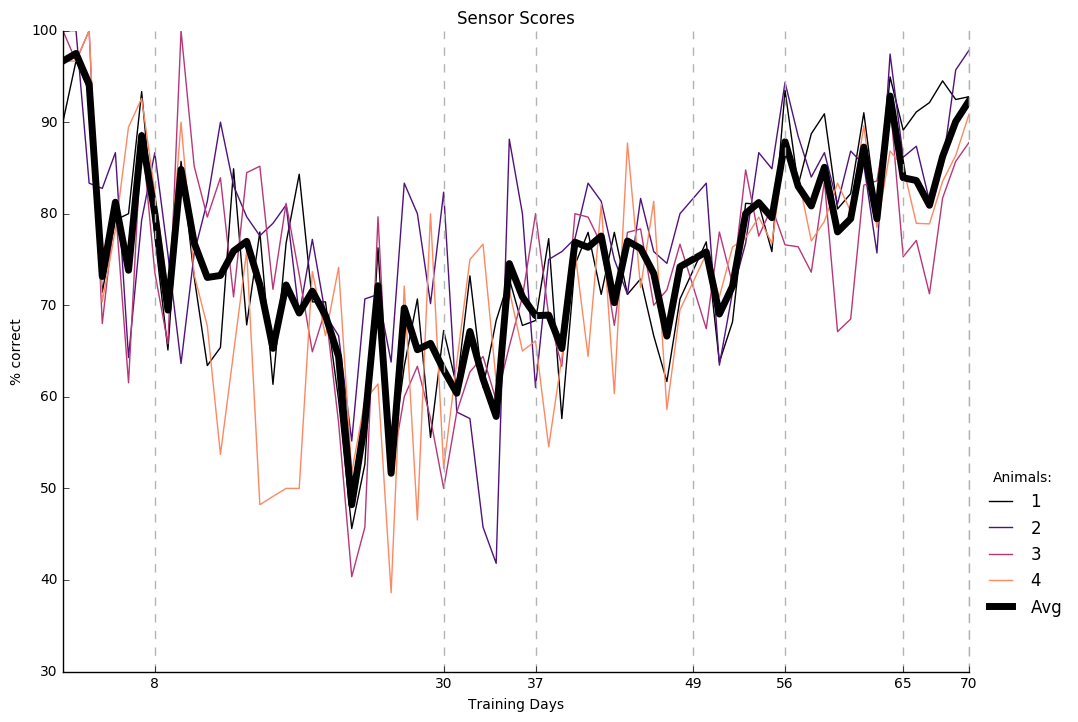

In [18]:
plotIt(sensorScores, title = "Sensor Scores", ylabel = "% correct", Phase = False, Norm = False)